https://github.com/storopoli/topic-modelling

https://towardsdatascience.com/text-analysis-basics-in-python-443282942ec5

In [1]:
import pandas as pd
import numpy as np
import nltk
import pickle
import pyLDAvis.sklearn
from collections import Counter
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns
# Libraries for text preprocessing
import re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
#nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer
%matplotlib inline
pd.options.mode.chained_assignment = None
pd.set_option('display.max_colwidth', 100)

C:\Users\mwamb\Anaconda3\lib\site-packages\past\builtins\misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping


In [2]:
def file_reader(file):
    pages = p.PdfFileReader(file)
    p_numbers = pages.getNumPages()
    text = ""
    
    for p_number in range(p_numbers):
        page = pages.getPage(p_number)
        text += page.extractText()
        
    return text

In [3]:
import PyPDF2 as p
HRCIOM_data = file_reader("C:/Users/mwamb/Desktop/Desktop/tenthdimensionanalytics/HCR IOM/HCR_IOM_result.pdf")



In [4]:
HRCIOM_data.lower()

'global \ntrendsforced displacement\n in 20192019 in review\ntrends at a glance\nat the end of 2019 as a result of persecution, con˜ict, \nviolence, human rights violations or events seriously \n\ndisturbing public order.\n79.5 \nmillion\nforcibly displaced worldwide\n107,800\nrefugees \nresettled\nunhcr submitted 81,600 refugees \nto states for resettlement. \n\naccording to government statistics, \n\n26 countries admitted 107,800 \n\nrefugees for resettlement during \n the year, with or without unhcr™s \n\nassistance.\n40%\n children\nan estimated 30 ˜ 34 million of  \n\nthe 79.5 million forcibly displaced \n\npersons were children below \n \n18 years of age.\n5.6\n million\n displaced people \nreturned \n5.6 million displaced people \n\nreturned to their areas or countries \n\nof origin, including 5.3 million \n\ninternally displaced persons and \n\n317,200 refugees. \n2.0\n million\n new claims\nasylum-seekers submitted 2.0 million \n\nnew claims. the united states of \n\namerica w

In [6]:
type(HRCIOM_data)

str

In [7]:
import spacy
from nltk.corpus import stopwords
sp = spacy.load('en_core_web_sm')

#stopwords = sp.Defaults.stop_words
#stopwords.words('english') + ('though','www','https','and/or','iv','|','v','puff','Œ','viii','da','ix','cc','by','nc','sa','igo','2019','2018')

from nltk.corpus import stopwords
stoplist = stopwords.words('english') + ['though','www','https','and/or','iv','|','v','puff','Œ','viii','da','ix','cc','by','nc',
 'sa','igo','2019','2018','(',')','©Shutterstock/Valeriya','Anufriyeva','//creativecommons.org/licenses/by-nc-sa/3.0/igo','BY-NC-SA', 
'xACKNOWLEDGEMENTS', 'iii','%', '<',  '>', '*', 'n.r','insecurityTotalTotalTotalTotalTotal47.648.328.58.78.58.0|','//iresearch.worldbank.org/PovcalNet/home.aspx',
                                       'ii', 'viiMETHODOLOGY' ]



In [8]:
type(HRCIOM_data)

str

In [9]:
Sent = nltk.word_tokenize(HRCIOM_data)
print(nltk.pos_tag(Sent))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [10]:
sent1 = nltk.pos_tag(Sent)

In [11]:
sent1[:30]

[('GLOBAL', 'NNP'),
 ('TRENDSFORCED', 'NNP'),
 ('DISPLACEMENT', 'NNP'),
 ('IN', 'NNP'),
 ('20192019', 'CD'),
 ('IN', 'NNP'),
 ('REVIEW', 'NNP'),
 ('Trends', 'NNP'),
 ('at', 'IN'),
 ('a', 'DT'),
 ('Glance', 'NN'),
 ('at', 'IN'),
 ('the', 'DT'),
 ('end', 'NN'),
 ('of', 'IN'),
 ('2019', 'CD'),
 ('as', 'IN'),
 ('a', 'DT'),
 ('result', 'NN'),
 ('of', 'IN'),
 ('persecution', 'NN'),
 (',', ','),
 ('con˜ict', 'NN'),
 (',', ','),
 ('violence', 'NN'),
 (',', ','),
 ('human', 'JJ'),
 ('rights', 'NNS'),
 ('violations', 'NNS'),
 ('or', 'CC')]

In [12]:
nouns=[]
nouns = [word for (word, pos) in sent1 if (pos == 'NN' or pos == 'NNS')] 

In [13]:
nouns

['Glance',
 'end',
 'result',
 'persecution',
 'con˜ict',
 'violence',
 'rights',
 'violations',
 'events',
 'order',
 'refugees',
 'States',
 'resettlement',
 'government',
 'statistics',
 'countries',
 'refugees',
 'resettlement',
 'year',
 'assistance',
 '%',
 'persons',
 'children',
 'years',
 'age',
 'people',
 'areas',
 'countries',
 'origin',
 'persons',
 'refugees',
 'claims',
 'world™s',
 'recipient',
 'applications',
 '%',
 'countries',
 'cent',
 'world™s',
 'refugees',
 'Venezuelans',
 'asylum',
 'cent',
 'total',
 '%',
 'cent',
 'refugees',
 'Venezuelans',
 'countries',
 'countries',
 'origin',
 'refugees',
 'refugees',
 'refugees',
 'mandate',
 'people',
 'asylum-seekers',
 'Venezuelans',
 'populations',
 'island',
 'number',
 'number',
 'refugees',
 'Source',
 'addition',
 'refugees',
 'mandate',
 '%',
 'thirds',
 'cent',
 'refugees',
 'Venezuelans',
 'countries',
 'refugees',
 'seekers',
 'Venezuelans',
 'number',
 'refugees',
 'people',
 'Venezuelans',
 '%',
 '%',
 '˚SO

In [14]:

tokens_without_sw = [word for word in nouns if not word in stoplist]

print(tokens_without_sw)

['Glance', 'end', 'result', 'persecution', 'con˜ict', 'violence', 'rights', 'violations', 'events', 'order', 'refugees', 'States', 'resettlement', 'government', 'statistics', 'countries', 'refugees', 'resettlement', 'year', 'assistance', 'persons', 'children', 'years', 'age', 'people', 'areas', 'countries', 'origin', 'persons', 'refugees', 'claims', 'world™s', 'recipient', 'applications', 'countries', 'cent', 'world™s', 'refugees', 'Venezuelans', 'asylum', 'cent', 'total', 'cent', 'refugees', 'Venezuelans', 'countries', 'countries', 'origin', 'refugees', 'refugees', 'refugees', 'mandate', 'people', 'asylum-seekers', 'Venezuelans', 'populations', 'island', 'number', 'number', 'refugees', 'Source', 'addition', 'refugees', 'mandate', 'thirds', 'cent', 'refugees', 'Venezuelans', 'countries', 'refugees', 'seekers', 'Venezuelans', 'number', 'refugees', 'people', 'Venezuelans', '˚SOURCE', '˚SOURCE', 'population', 'statistics', 'reasons', 'addition', 'ones', 'corrections', 'adjustments', 'resu

In [15]:
from nltk import ngrams
#from nltk import bigrams, trigrams

In [16]:
#bigram=list(ngrams(tokens_without_sw,2))

In [16]:
#bigram

In [17]:
#trigram=list(ngrams(tokens_without_sw,3))

In [18]:
#trigram

In [19]:
#bigrams_trigrams = bigram + trigram
#print(bigrams_trigrams)

In [20]:
#type(bigrams_trigrams)

In [21]:
#bigrams_trigrams[:4]

In [17]:
# using list comprehension 
listToStr = ' '.join([str(elem) for elem in tokens_without_sw]) 
  
print(listToStr)

Glance end result persecution con˜ict violence rights violations events order refugees States resettlement government statistics countries refugees resettlement year assistance persons children years age people areas countries origin persons refugees claims world™s recipient applications countries cent world™s refugees Venezuelans asylum cent total cent refugees Venezuelans countries countries origin refugees refugees refugees mandate people asylum-seekers Venezuelans populations island number number refugees Source addition refugees mandate thirds cent refugees Venezuelans countries refugees seekers Venezuelans number refugees people Venezuelans ˚SOURCE ˚SOURCE population statistics reasons addition ones corrections adjustments result registration verification exercises deaths births reasons estimates result methodologies access populations changes classification populations refugees camp way dignity kits distribution point camp prospects return con˜ict home refugees insecurity host c

https://www.pythonprogramming.in/generate-the-n-grams-for-the-given-sentence-using-nltk-or-textblob.html

In [18]:
from textblob import TextBlob
 
# Function to generate n-grams from sentences.
def extract_ngrams(listToStr, num):
    n_grams = TextBlob(listToStr).ngrams(num)
    return [ ' '.join(grams) for grams in n_grams]

In [19]:
bigram= extract_ngrams(listToStr, 2)

In [20]:
bigram

['Glance end',
 'end result',
 'result persecution',
 'persecution con˜ict',
 'con˜ict violence',
 'violence rights',
 'rights violations',
 'violations events',
 'events order',
 'order refugees',
 'refugees States',
 'States resettlement',
 'resettlement government',
 'government statistics',
 'statistics countries',
 'countries refugees',
 'refugees resettlement',
 'resettlement year',
 'year assistance',
 'assistance persons',
 'persons children',
 'children years',
 'years age',
 'age people',
 'people areas',
 'areas countries',
 'countries origin',
 'origin persons',
 'persons refugees',
 'refugees claims',
 'claims world™s',
 'world™s recipient',
 'recipient applications',
 'applications countries',
 'countries cent',
 'cent world™s',
 'world™s refugees',
 'refugees Venezuelans',
 'Venezuelans asylum',
 'asylum cent',
 'cent total',
 'total cent',
 'cent refugees',
 'refugees Venezuelans',
 'Venezuelans countries',
 'countries countries',
 'countries origin',
 'origin refugees'

In [21]:
type(bigram)

list

In [22]:

trigram= extract_ngrams(listToStr, 3)

In [23]:
trigram

['Glance end result',
 'end result persecution',
 'result persecution con˜ict',
 'persecution con˜ict violence',
 'con˜ict violence rights',
 'violence rights violations',
 'rights violations events',
 'violations events order',
 'events order refugees',
 'order refugees States',
 'refugees States resettlement',
 'States resettlement government',
 'resettlement government statistics',
 'government statistics countries',
 'statistics countries refugees',
 'countries refugees resettlement',
 'refugees resettlement year',
 'resettlement year assistance',
 'year assistance persons',
 'assistance persons children',
 'persons children years',
 'children years age',
 'years age people',
 'age people areas',
 'people areas countries',
 'areas countries origin',
 'countries origin persons',
 'origin persons refugees',
 'persons refugees claims',
 'refugees claims world™s',
 'claims world™s recipient',
 'world™s recipient applications',
 'recipient applications countries',
 'applications countri

In [24]:
bigrams_trigrams = bigram + trigram
print(bigrams_trigrams)

['Glance end', 'end result', 'result persecution', 'persecution con˜ict', 'con˜ict violence', 'violence rights', 'rights violations', 'violations events', 'events order', 'order refugees', 'refugees States', 'States resettlement', 'resettlement government', 'government statistics', 'statistics countries', 'countries refugees', 'refugees resettlement', 'resettlement year', 'year assistance', 'assistance persons', 'persons children', 'children years', 'years age', 'age people', 'people areas', 'areas countries', 'countries origin', 'origin persons', 'persons refugees', 'refugees claims', 'claims world™s', 'world™s recipient', 'recipient applications', 'applications countries', 'countries cent', 'cent world™s', 'world™s refugees', 'refugees Venezuelans', 'Venezuelans asylum', 'asylum cent', 'cent total', 'total cent', 'cent refugees', 'refugees Venezuelans', 'Venezuelans countries', 'countries countries', 'countries origin', 'origin refugees', 'refugees refugees', 'refugees refugees', 're

In [25]:
type(bigrams_trigrams)

list

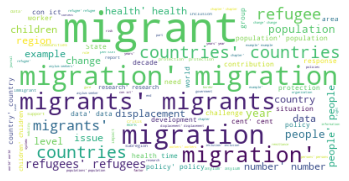

In [26]:
#Word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

wordcloud = WordCloud(
                          background_color='white',
                         
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(bigrams_trigrams))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

In [30]:

tf_vectorizer = CountVectorizer(max_df=1.0, min_df=1, max_features=None)
tf = tf_vectorizer.fit_transform(bigrams_trigrams)
tf_feature_names = tf_vectorizer.get_feature_names()
doc_term_matrix = pd.DataFrame(tf.toarray(), columns=list(tf_feature_names))
doc_term_matrix

MemoryError: 

In [28]:
lda_model = LatentDirichletAllocation(n_components=3, learning_method='batch', max_iter=5, random_state=0).fit(tf)
no_top_words = 10
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                          for i in topic.argsort()[:-no_top_words - 1:-1]]))
              
display_topics(lda_model, tf_feature_names, no_top_words)

Topic 0:
migration data research country countries workers origin time rights contributions
Topic 1:
migrants refugees countries number people health asylum inclusion persons example
Topic 2:
migration migrants population countries cent change policy world children years


In [31]:
import pyLDAvis.sklearn


In [32]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda_model, tf, tf_vectorizer, mds='tsne')
panel

of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.
 [_prepare.py:257]


PreparedData(topic_coordinates=                 x           y  topics  cluster       Freq
topic                                                     
1      -632.045471 -384.325073       1        1  34.875643
0     -1209.665405  212.164124       2        1  33.072397
2     -1437.453247 -586.322510       3        1  32.051960, topic_info=     Category         Freq          Term        Total  loglift  logprob
3432  Default  6735.000000     migration  6735.000000  30.0000  30.0000
4320  Default  2563.000000      refugees  2563.000000  29.0000  29.0000
3423  Default  4991.000000      migrants  4991.000000  28.0000  28.0000
3651  Default  1645.000000        number  1645.000000  27.0000  27.0000
1779  Default  1448.000000          data  1448.000000  26.0000  26.0000
...       ...          ...           ...          ...      ...      ...
2005   Topic3   504.403756  displacement   981.439688   0.4722  -4.8660
2724   Topic3   646.443806        health  1793.066183   0.1176  -4.6179
1703   Topic3   608.883466       country  1594.614153   0.1751  -4.6777
4162   Topic3   448.772810    protection  1078.873074   0.2607  -4.9828
4318   Topic3   386.619163       refugee   834.775408   0.3681  -5.1319

[211 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
783       3  0.991855  ability
801       1  0.982949   access
801       2  0.002857   access
801       3  0.014287   access
811       1  0.997035  account
...     ...       ...      ...
5512      2  0.877543      www
5512      3  0.108585      www
5522      1  0.016077    years
5522      2  0.165056    years
5522      3  0.817776    years

[365 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3])